# Git commit graph, looking upwards from a `HEAD` commit

SPDX-License-Identifier: 0BSD

An actual graph points from newer commits to their temporal ancestors, but
I&rsquo;ve shown the transpose (i.e., reversed) graph.

In [1]:
import os

import graphviz
import pygit2
from typeguard import typechecked

In [2]:
# The font commit hashes and messages will be written in, in rendered graphs.
NODE_LABEL_FONT = 'Segoe UI' if os.name == 'nt' else 'Helvetica'

In [3]:
@typechecked
def show(repo_path: str) -> graphviz.Digraph:
    """Create a Graphviz graph of a Git repository."""
    repo = pygit2.Repository(repo_path)
    commits = set()
    graph = graphviz.Digraph()
    
    @typechecked
    def visit(commit: pygit2.Commit) -> None:
        if commit in commits:
            return
        commits.add(commit)
        short_hash = commit.hex[:7]
        short_message = commit.message.split('\n\n')[0]
        graph.node(commit.hex, label=f'{short_hash}\n{short_message}',
                   shape='plain', fontname=NODE_LABEL_FONT, fontsize='12')
    
    visit(repo[repo.head.target])
    
    for child in repo.walk(repo.head.target):
        for parent in child.parents:
            visit(parent)
            graph.edge(parent.hex, child.hex)
    
    return graph

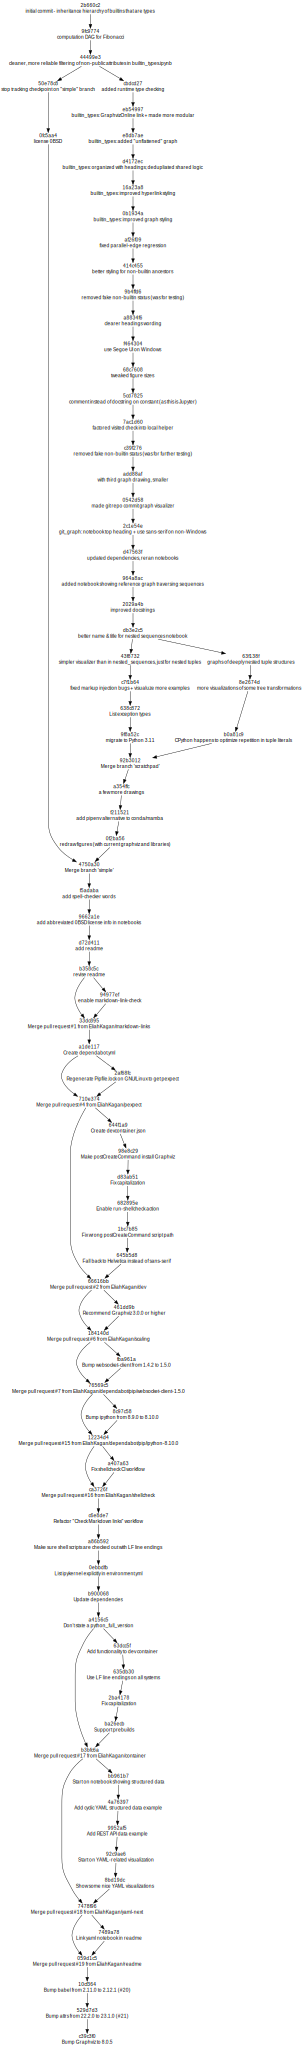

In [4]:
show('.')

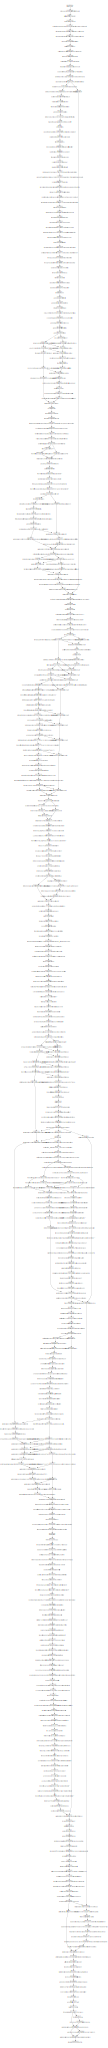

In [5]:
show('../Flood')